In [135]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [136]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [137]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [139]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [140]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [141]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [142]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [143]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [144]:
LEARNING_RATE = 0.4

In [145]:
%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

Iteration 100 : Loss 4218.4678
Iteration 200 : Loss 3599.9450
Iteration 300 : Loss 3330.6235
Iteration 400 : Loss 3184.2205
Iteration 500 : Loss 3093.6569
Iteration 600 : Loss 3034.1287
Iteration 700 : Loss 2993.8825
Iteration 800 : Loss 2966.2471
Iteration 900 : Loss 2947.0593
Iteration 1000 : Loss 2933.6061


np.float64(2864.5195177474716)

loss가 잘 줄어든다

아마 y 를 정규화 한다면 loss가 3000이상 처럼 큰 수는 나오지 않을것 같다.(이러면 치팅인가요..?)

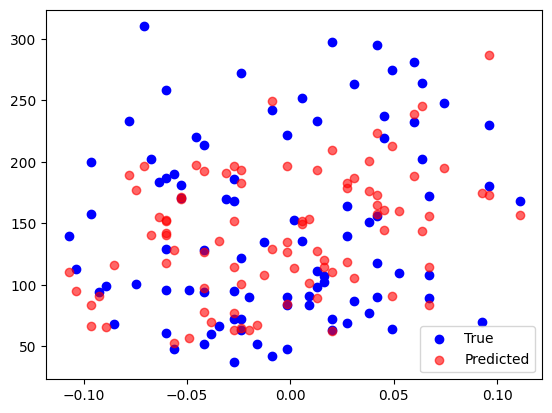

In [147]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, color='blue', label='True')
plt.scatter(X_test[:, 0], prediction, color='red', alpha=0.6, label='Predicted')
plt.legend()
plt.show()


가독성 좋게 시각화 부분을 개선